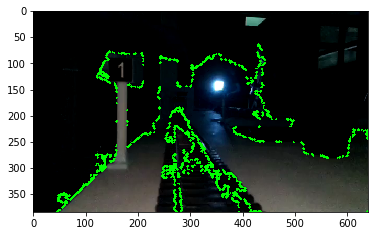

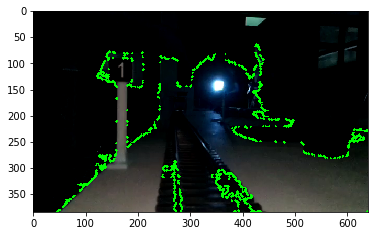

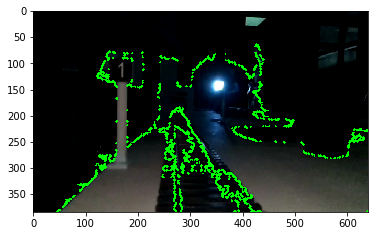

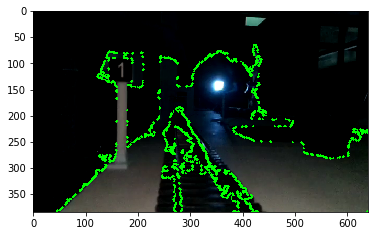

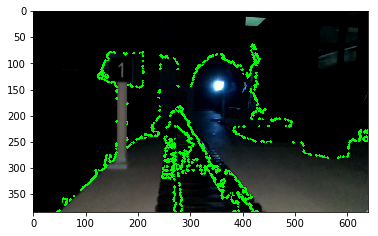

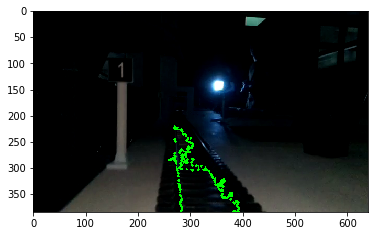

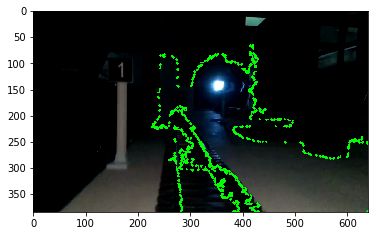

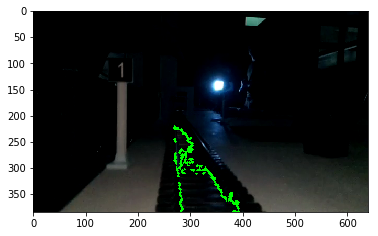

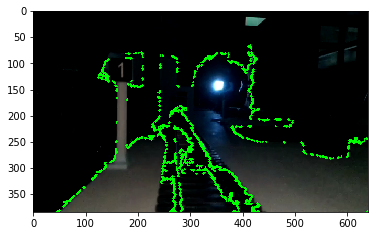

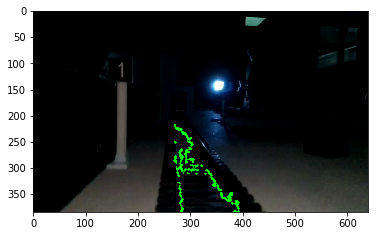

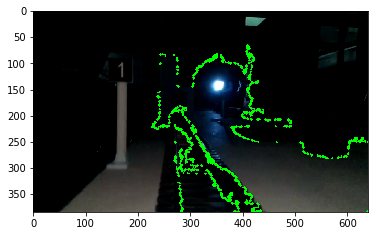

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [21]:
import math
import numpy as np
import sys
import cv2
import time
import subprocess
from PIL import Image
import re
import numpy as np
import matplotlib.pyplot as plt

def angle(pt1, pt2, pt0):
    dx1 = pt1[0][0] - pt0[0][0]
    dy1 = pt1[0][1] - pt0[0][1]
    dx2 = pt2[0][0] - pt0[0][0]
    dy2 = pt2[0][1] - pt0[0][1]
    return float((dx1*dx2 + dy1*dy2))/math.sqrt(float((dx1*dx1 + dy1*dy1))*(dx2*dx2 + dy2*dy2) + 1e-10)

vidcap = cv2.VideoCapture('1556872376191_video.mp4')

count = 0
while True:
    success,image = vidcap.read()
    #image = cv2.imread('picture_38.jpg')

    #image = image[0: 250, 0:500]

    imgray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    #ret, thresh = cv2.threshold(imgray, 127, 255, 0)

    img2, contours, hierarchy = cv2.findContours(imgray ,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)


    img = image.copy()
    for i in range(0, len(contours)):
        img = contours[i]
        epsilon = 0.1*cv2.arcLength(contours[i],True)
        approx = cv2.approxPolyDP(contours[i], epsilon, closed=True)
        if(abs(cv2.contourArea(contours[i])) > 2 and len(approx) == 2 and not(cv2.isContourConvex(approx))):
            x, y, w, h = cv2.boundingRect(img)

            if(w > 75 and h > 100):
                relation = h/w
                r = h/8
                u = w /4

                cv2.drawContours(image, contours[i], -1, (0,255,0), 3)
                plt.imshow(image, cmap='gray')
                plt.show()





In [18]:
    approx = cv2.approxPolyDP(contours[i], cv2.arcLength(img, True)*0.02, False)
    if(len(approx) == 4 ):
        
        x, y, w, h = cv2.boundingRect(img)

        if(w > 75 and h > 100):
            relation = h/w
            r = h/8
            u = w /4

            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 3)
            
            plt.imshow(img, cmap='gray')
            plt.show()